# Implementación k-means con el método kmeans de Scipy.

Hemos utilizado el dataset College.csv, en el cual podemos encontrar información sobre universidades de Estados Unidos del US News and World Report de 1995.

Dicho data set contiene 777 observaciones y 18 variables entre las cuales se encuentran si es pública o privada, el nº de solicitudes que aceptan, el coste de la matrícula y libros, etc.

El objetivo de nuestro estudio es agrupar las universidades de US en función de las características que comparten.

Para conseguir nuestro objetivo, implementaremos el algoritmo de agrupación K-means para 2,3 y 4 cluster (k=2,3,4), el cual nos permitirá dividir las universidades en tantos grupos como queramos en función de los atributos de las universidades.

En primer lugar importamos los módulos necesarios y cargamos el data set.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time

from scipy.cluster.vq import whiten,kmeans,vq
from sklearn import metrics
import sys

In [2]:
# Cargamos el dataset
df = pd.read_csv('College.csv')
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [3]:
df['Private'].replace({'Yes' : 1, 'No' : 0}, inplace = True)

Ahora normalizamos los datos con la función whiten

In [4]:
data=whiten(df)

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
data=df.values

In [7]:
type(data)

numpy.ndarray

In [8]:
t1= time.time()

In [9]:
#Para k=2 (2 cluster)
centroids,_ = kmeans(data,2)

In [10]:
t2=time.time()
tiempo = float(t2-t1)

print('K-means utilizando scipy.kmeans() para k=2')
print("Tiempo de ejecucion: {} segundos".format(tiempo))

K-means utilizando scipy.kmeans() para k=2
Tiempo de ejecucion: 0.031339168548583984 segundos


In [11]:
# Se asigna cada punto a un cluster
idx,_ = vq(data,centroids)
idx,_

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 

In [12]:
centroids

array([[1.33333333e-01, 9.32110833e+03, 6.25803333e+03, 2.53400000e+03,
        3.09250000e+01, 6.18250000e+01, 1.31898750e+04, 2.77837500e+03,
        8.36930833e+03, 4.14956667e+03, 5.78075000e+02, 1.79388333e+03,
        8.26166667e+01, 8.84750000e+01, 1.63508333e+01, 1.58750000e+01,
        9.54789167e+03, 6.06833333e+01],
       [8.35616438e-01, 1.84739726e+03, 1.24451598e+03, 4.59602740e+02,
        2.69436834e+01, 5.46955860e+01, 1.96657991e+03, 5.04051750e+02,
        1.08190000e+04, 4.39550989e+03, 5.44140030e+02, 1.25785845e+03,
        7.08417047e+01, 7.81004566e+01, 1.36767123e+01, 2.39984779e+01,
        9.68067884e+03, 6.63363775e+01]])

In [13]:
# Medimos el tamaño en bytes del objeto
print(sys.getsizeof(centroids,_), 'bytes')

400 bytes


In [14]:
metrics.silhouette_score(data, idx, metric='euclidean')

0.5058570905106397

In [15]:
t1= time.time()

In [16]:
#K = 3 (3 clusters)
centroids,_ = kmeans(data,3)

In [17]:
t2=time.time()
tiempo = float(t2-t1)

print('K-means utilizando scipy.kmeans() para k=3')
print("Tiempo de ejecucion: {} segundos".format(tiempo))

K-means utilizando scipy.kmeans() para k=3
Tiempo de ejecucion: 0.0307309627532959 segundos


In [18]:
# # Se asigna cada punto a un cluster
idx,_ = vq(data,centroids)
idx,_

(array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2,
        1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1,
        0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 1, 0, 1,
        1, 1, 1, 2, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1,
        1, 1, 1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0,
        1, 0, 2, 2, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 2, 1, 1, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 0, 1,
        1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 

In [19]:
centroids

array([[9.93150685e-01, 3.68874658e+03, 2.06339726e+03, 6.52609589e+02,
        4.78150685e+01, 7.53013699e+01, 2.58877397e+03, 2.79541096e+02,
        1.66446164e+04, 5.43751370e+03, 5.68787671e+02, 1.03649315e+03,
        8.68561644e+01, 9.28767123e+01, 1.04952055e+01, 3.39589041e+01,
        1.70270479e+04, 8.00000000e+01],
       [8.00000000e-01, 1.38932745e+03, 1.02735882e+03, 4.12598039e+02,
        2.16431373e+01, 4.92372549e+01, 1.80645294e+03, 5.61964706e+02,
        9.29195294e+03, 4.12940000e+03, 5.36911765e+02, 1.32059020e+03,
        6.63705882e+01, 7.39921569e+01, 1.44527451e+01, 2.13215686e+01,
        7.81019608e+03, 6.27156863e+01],
       [9.91735537e-02, 8.96825620e+03, 6.14381818e+03, 2.48209091e+03,
        2.80495868e+01, 5.99090909e+01, 1.30212893e+04, 2.78638017e+03,
        7.79661157e+03, 4.01592562e+03, 5.78520661e+02, 1.79214876e+03,
        8.20413223e+01, 8.78760331e+01, 1.68966942e+01, 1.52066116e+01,
        8.56862810e+03, 5.95041322e+01]])

In [20]:
metrics.silhouette_score(data, idx, metric='euclidean')

0.4617585374286157

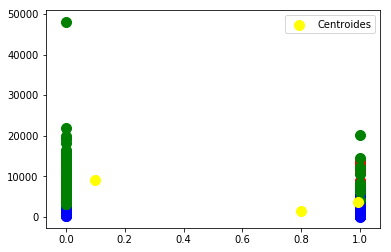

In [21]:
#Visualizamos los cluster
plt.scatter(data[idx == 0, 0], data[idx == 0, 1], s = 100, c = 'red', )
plt.scatter(data[idx == 1, 0], data[idx == 1, 1], s = 100, c = 'blue',)
plt.scatter(data[idx == 2, 0], data[idx == 2, 1], s = 100, c = 'green')



#Graficamos los centroides en amarillo
plt.scatter(centroids[:, 0], centroids[:,1], s = 100, c = 'yellow', label = 'Centroides')

plt.legend()

In [22]:
t1=time.time()

In [23]:
#K = 4 (4 clusters)
centroids,_ = kmeans(data,4)

In [24]:
t2=time.time()
tiempo = float(t2-t1)

print('K-means utilizando scipy.kmeans() para k=4')
print("Tiempo de ejecucion: {} segundos".format(tiempo))

K-means utilizando scipy.kmeans() para k=4
Tiempo de ejecucion: 0.03307700157165527 segundos


In [25]:
# Se asigna cada punto a un cluster
idx,_ = vq(data,centroids)
idx,_

(array([1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 1, 3, 2,
        0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 3, 3, 0, 2, 0, 1, 0, 1,
        0, 1, 0, 3, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 2, 3, 2, 3, 0, 3, 0,
        1, 0, 0, 2, 3, 3, 3, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1, 0, 0, 0, 3, 3,
        0, 1, 0, 3, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 3, 0,
        0, 0, 1, 1, 3, 3, 0, 0, 2, 1, 0, 0, 3, 3, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 3, 0, 3, 3, 2, 1, 0, 3, 0, 1, 0, 0, 3, 0, 0, 3, 1,
        1, 0, 0, 0, 3, 3, 0, 1, 3, 0, 3, 1, 1, 0, 1, 0, 0, 0, 3, 0, 3, 3,
        2, 1, 1, 0, 1, 1, 0, 1, 3, 0, 0, 0, 1, 0, 0, 3, 1, 0, 0, 1, 0, 1,
        0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 3,
        1, 3, 2, 1, 0, 3, 1, 0, 0, 0, 3, 0, 1, 1, 0, 0, 0, 3, 1, 0, 0, 0,
        3, 0, 0, 1, 0, 1, 1, 0, 3, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 1, 0, 2, 0, 0, 1, 1, 2, 1, 0, 2, 0, 2, 1, 1, 1, 0, 3, 1,
        0, 0, 2, 1, 1, 1, 3, 0, 0, 0, 

In [26]:
centroids

array([[9.85029940e-01, 1.33344311e+03, 1.04002695e+03, 3.61592814e+02,
        2.48113772e+01, 5.27784431e+01, 1.47936228e+03, 4.34673653e+02,
        1.13974461e+04, 4.55677246e+03, 5.31299401e+02, 1.20981737e+03,
        6.89970060e+01, 7.72035928e+01, 1.31374251e+01, 2.53413174e+01,
        8.99098802e+03, 6.86766467e+01],
       [4.71861472e-01, 2.05078355e+03, 1.40406494e+03, 6.25363636e+02,
        1.81298701e+01, 4.58354978e+01, 3.01122078e+03, 8.78164502e+02,
        6.51615152e+03, 3.58617749e+03, 5.40398268e+02, 1.45152814e+03,
        6.59307359e+01, 7.24761905e+01, 1.65549784e+01, 1.54155844e+01,
        6.37490476e+03, 5.50649351e+01],
       [9.67741935e-02, 1.01001828e+04, 6.94019355e+03, 2.80427957e+03,
        3.09354839e+01, 6.28602151e+01, 1.47301075e+04, 3.08884946e+03,
        8.21336559e+03, 4.11437634e+03, 5.94247312e+02, 1.89392473e+03,
        8.33655914e+01, 8.89139785e+01, 1.65010753e+01, 1.55913978e+01,
        9.18816129e+03, 6.04301075e+01],
       [9.915

In [27]:
metrics.silhouette_score(data, idx, metric='euclidean')

0.3080804008426199